In [2]:
from pandas import read_csv

url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/refs/heads/main/data/boston_housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

boston_pd = read_csv(url, delimiter = r'\s+', names = column_names)
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
import plotly.express as px

fig = px.histogram(boston_pd, x = 'PRICE')
fig.show()

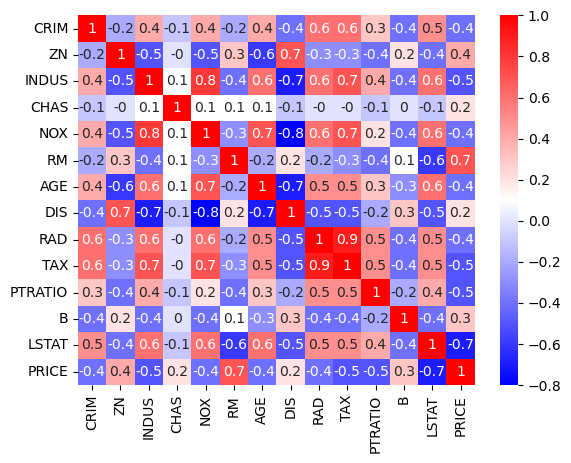

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston_pd.corr().round(1)
sns.heatmap(data = corr_mat, annot = True, cmap = 'bwr');

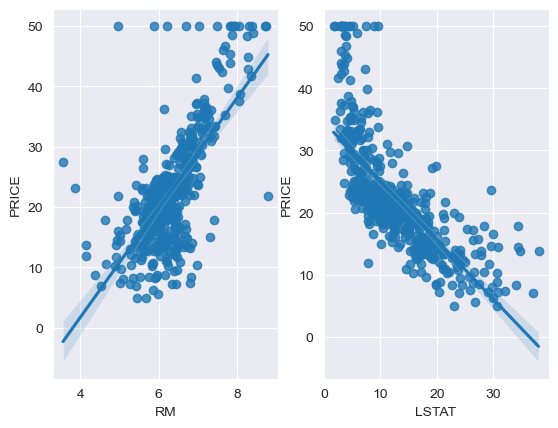

In [10]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols = 2)
sns.regplot(x = 'RM', y = 'PRICE', data = boston_pd, ax = ax[0])
sns.regplot(x = 'LSTAT', y = 'PRICE', data = boston_pd, ax = ax[1])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [14]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

rmse_tr, rmse_test

(4.642806069019824, 4.931352584146716)

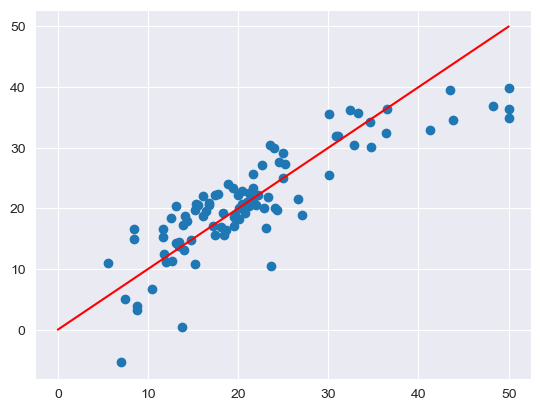

In [16]:
plt.scatter(y_test, pred_test)
plt.plot([0, 50], [0, 50], 'r')
plt.show()

In [18]:
X = boston_pd.drop(['PRICE', 'LSTAT'], axis = 1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

rmse_tr, rmse_test

(5.165137874244864, 5.2955950325971655)

In [20]:
from sklearn.tree import DecisionTreeRegressor

reg_dt = DecisionTreeRegressor(max_depth = 2, random_state = 13)
reg_dt.fit(X_train, y_train)

y_pred_dt = reg_dt.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_test

5.698005991702834